In [1]:
import cv2
import numpy as np

In [12]:
# Mount Drive in Colab

In [2]:
net = cv2.dnn.readNet("/content/drive/My Drive/Yolo V3 for OpenCV/yolov3_implementation/yolov3.weights", "/content/drive/My Drive/Yolo V3 for OpenCV/yolov3_implementation/yolov3.cfg")
classes = []

with open("/content/drive/My Drive/Yolo V3 for OpenCV/yolov3_implementation/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

print(len(classes))
layer_names = net.getLayerNames()
#print(layer_names)
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
#print(output_layers)

# colors for different objects
colors = np.random.uniform(0, 255, size=(len(classes), 3))

80


In [5]:
from google.colab.patches import cv2_imshow

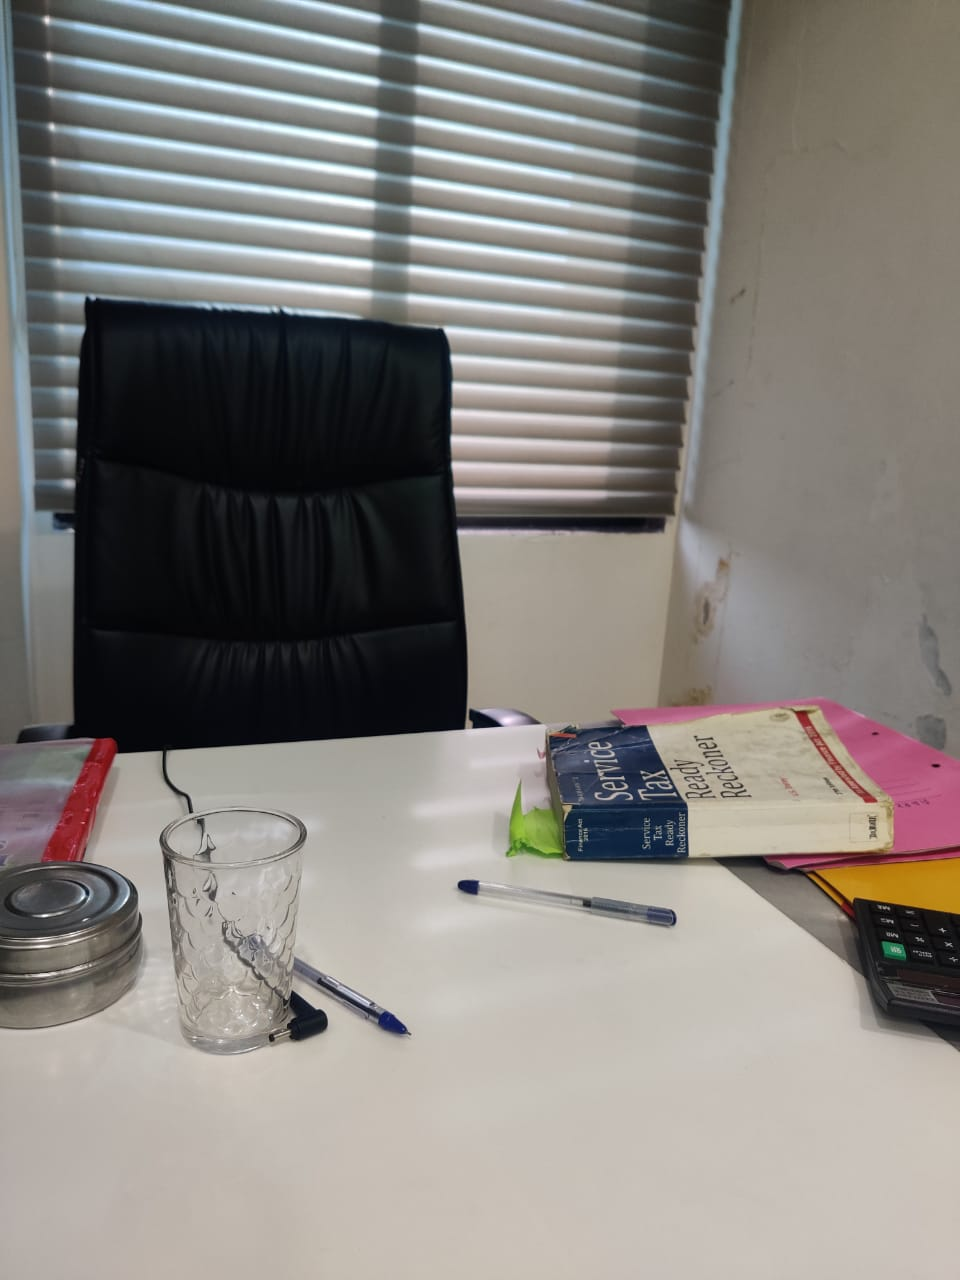

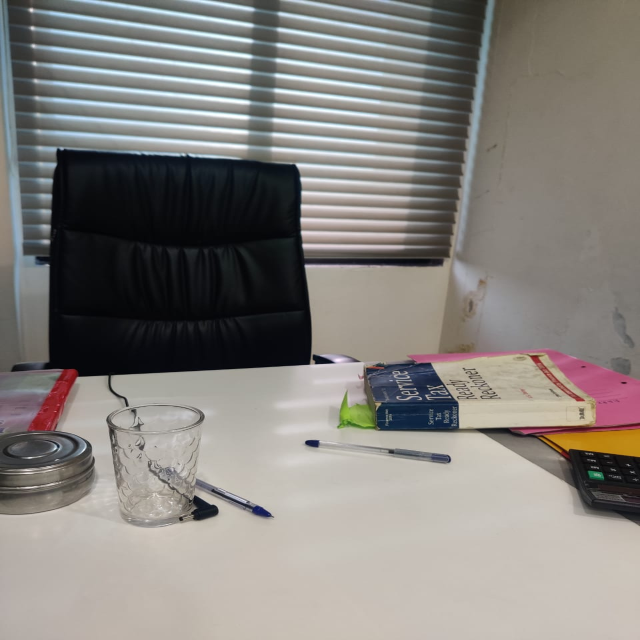

In [7]:
img = cv2.imread("/content/drive/My Drive/Yolo V3 for OpenCV/yolov3_implementation/2.jpeg")
#img = cv2.resize(img, None,fx=.5,fy=.5)

#cv2.imshow("image",img)
cv2_imshow(img)

# NOTE, INPUT IMAGES SHOULD BE MULTIPLES OF 32 !!!!!!!!!!!!!!!!!!!!!
img = cv2.resize(img,(640,640))
#cv2.imshow("image",img)
cv2_imshow(img)


In [8]:
# detecting objects
height, width, channels = img.shape
blob = cv2.dnn.blobFromImage(img, .00392, (height, width), (0,0,0), True, crop=False)
# blob basically seperates images in 3 channels
#print(blob.shape)
'''
for b in blob:
    for n,img_blob in enumerate(b):
        cv2.imshow(str(n),img_blob)
'''        

net.setInput(blob)
outs = net.forward(output_layers)

In [9]:
# showing info on the screen
class_ids = []
confidences =[]
boxes =[]

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if(confidence > .5) :
            # object dtected 
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2]*width)
            h = int(detection[3]*height)
            
            #cv2.circle(img, (center_x,center_y), 10,(0,255,0),2)
            # Rectangle Co-ordinates
            x = int(center_x - w/2 )
            y = int(center_y - h/2 )
            
            #cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
            
            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

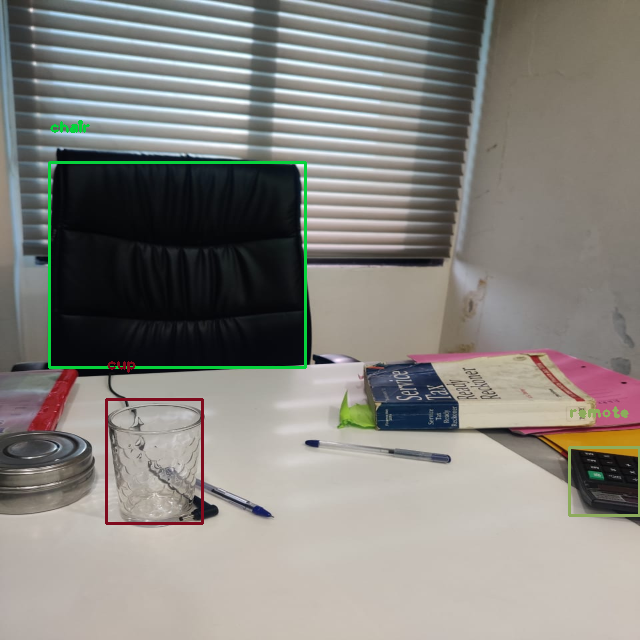

In [11]:
indexes = cv2.dnn.NMSBoxes(boxes,confidences, 0.5, 0.4) #used in non max supression
#this basically gives the indexes which should be used after NMS implemented
#print(indexes) 
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x,y,w,h = boxes[i]
        label = classes[class_ids[i]]
        color = colors[class_ids[i]]
        cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
        cv2.putText(img,label,(x,y-30),font,1,color,2)
    
# use non max supression to remove multiple detections for the same object.

cv2_imshow(img)